In [30]:
# Tensorflow NLP
https://www.youtube.com/watch?v=fNxaJsNG3-s&list=PLQY2H8rRoyvzDbLUZkbudP-MFQZwNmU4S


### Tokenization 
# letters can be represented as numbers
# LISTEN vs SILENT
# encode words not letters
# LISTEN = 1, SILENT = 2
# I love my dog => 1 2 3 4
# I love my cat => 1 2 3 5


https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%203%20-%20NLP/Course%203%20-%20Week%201%20-%20Lesson%201.ipynb

Kaggle Dataset:
url = 'rishabhmisra.github.io/publications/'


SyntaxError: invalid decimal literal (3034294799.py, line 14)

In [74]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import json
import numpy as np
import matplotlib.pyplot as plt

In [18]:
sentences = [
    'I love my dog',
    'I love my cat',
    'You love my dog!',
    'Do you think my dog is amazing?'
]

tokenizer = Tokenizer(num_words = 100, oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index # full list of words


In [14]:
print(word_index)


{'<OOV>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}


In [15]:
sequences = tokenizer.texts_to_sequences(sentences) # sequences = tokenized sentences
print(sequences)

[[5, 3, 2, 4], [5, 3, 2, 7], [6, 3, 2, 4], [8, 6, 9, 2, 4, 10, 11]]


In [16]:
test_seq = tokenizer.texts_to_sequences(['i really love my dog', 'my dog loves my manatee'])
print(test_seq)

[[5, 1, 3, 2, 4], [2, 4, 1, 2, 1]]


In [29]:
# a ragged tensor is a tensor that has an irregular shape
print('sequences: ', sequences)
padded = pad_sequences(sequences, padding='post', truncating='post')
print('padded: ', padded)

padded_2 = pad_sequences(sequences, padding='pre', maxlen=5, truncating='pre')
print('padded_2: ', padded_2)

sequences:  [[5, 3, 2, 4], [5, 3, 2, 7], [6, 3, 2, 4], [8, 6, 9, 2, 4, 10, 11]]
padded:  [[ 5  3  2  4  0  0  0]
 [ 5  3  2  7  0  0  0]
 [ 6  3  2  4  0  0  0]
 [ 8  6  9  2  4 10 11]]
padded_2:  [[ 0  5  3  2  4]
 [ 0  5  3  2  7]
 [ 0  6  3  2  4]
 [ 9  2  4 10 11]]


In [34]:
url = 'rishabhmisra.github.io/publications/'
# 1 = sarcasm
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/sarcasm.json \
    -O /tmp/sarcasm.json

--2023-09-25 14:39:20--  https://storage.googleapis.com/learning-datasets/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.164.27, 172.217.0.91, 172.217.12.27, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.164.27|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  16.8MB/s    in 0.3s    

2023-09-25 14:39:20 (16.8 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [37]:
with open('/tmp/sarcasm.json', 'r') as f:
  datastore = json.load(f)

sentences = []
labels = []
urls = []

for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])
  urls.append(item['article_link'])

In [137]:
# Configs
training_size = 20500
vocab_size = 80000
embedding_dim = 12
max_length = 100
num_epochs = 20
oov_token = "<OOV>"


In [138]:
print(len(sentences))
training_sentences = sentences[:training_size]
testing_sentences = sentences[training_size:]

training_labels = labels[:training_size]
testing_labels = labels[training_size:]

tokenizer = Tokenizer(oov_token=oov_token, num_words=vocab_size)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

training_sentences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sentences, padding='post', maxlen=max_length, truncating='post')

testing_sentences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sentences, padding='post', maxlen=max_length, truncating='post')

training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

26709


In [139]:
# bad = [-1, 0]
# good = [1, 0]
# meh = [-0.4, -0.7]
# not bad = [0.5, 0.7]
# vector can be meaning of the word

# <---- bad | good ------>
# EMBEDDING


In [147]:
model = tf.keras.models.Sequential([
  keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
  keras.layers.GlobalAveragePooling1D(),
  keras.layers.Dense(24, activation='relu',  kernel_regularizer=tf.keras.regularizers.l2(0.05)), # max(x, n)
  keras.layers.Dropout(0.2),
  keras.layers.Dense(1, activation='sigmoid') # 0...1
])
print(model.summary())
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_19 (Embedding)    (None, 100, 12)           960000    
                                                                 
 global_average_pooling1d_1  (None, 12)                0         
 9 (GlobalAveragePooling1D)                                      
                                                                 
 dense_38 (Dense)            (None, 24)                312       
                                                                 
 dropout_12 (Dropout)        (None, 24)                0         
                                                                 
 dense_39 (Dense)            (None, 1)                 25        
                                                                 
Total params: 960337 (3.66 MB)
Trainable params: 960337 (3.66 MB)
Non-trainable params: 0 (0.00 Byte)
_________________

In [148]:
history = model.fit(
  training_padded,
  training_labels,
  epochs=num_epochs,
  validation_data=(testing_padded, testing_labels),
  verbose=0
)

195/195 - 0s - loss: 0.3833 - accuracy: 0.8584 - 214ms/epoch - 1ms/step
loss - sparse categorical crossentry 0.38334164023399353
validation accuracy:  85.84312796592712


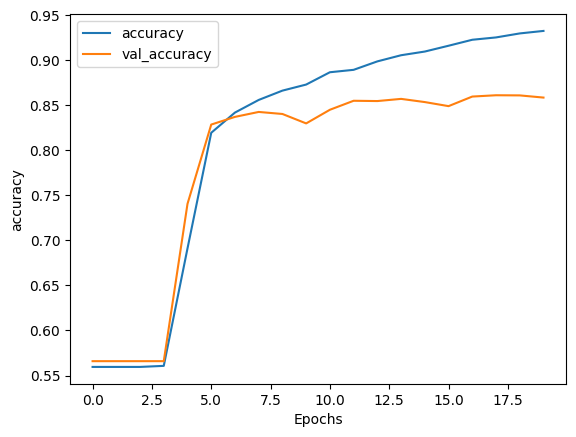

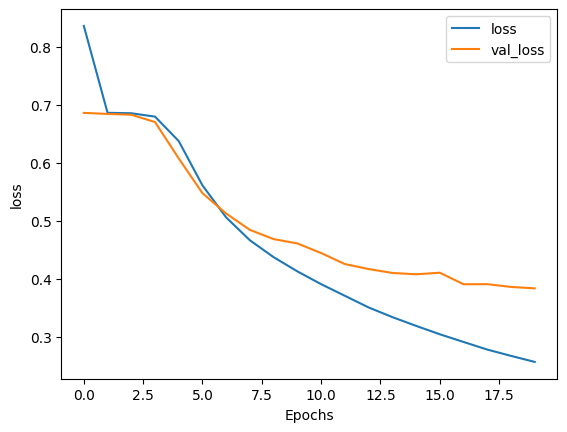

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string]) # test 
  plt.plot(history.history['val_'+string]) # validation

  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# 0 slient, 1 progress bar, 2 one line per epoch or batch
loss, accuracy = model.evaluate(testing_padded, testing_labels, verbose=2)
print("loss - sparse categorical crossentry", loss)
print("validation accuracy: ", accuracy * 100)

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')
print(history.history.keys())


In [146]:
new_sentences = [
  'granny starting to fear spiders in the garden might be real',
  'the weather today is bright and sunny',
  'the time is 10:30 am',
  'that was the best pie anyone has ever tasted in the entire universe',
]

new_sequences = tokenizer.texts_to_sequences(new_sentences)
new_padded = pad_sequences(new_sequences, padding='post', maxlen=max_length, truncating='post')

print(model.predict(new_padded))

1/1 [==============================] - 0s 29ms/step
[[0.24583036]
 [0.00577097]
 [0.02127362]
 [0.14939043]]
